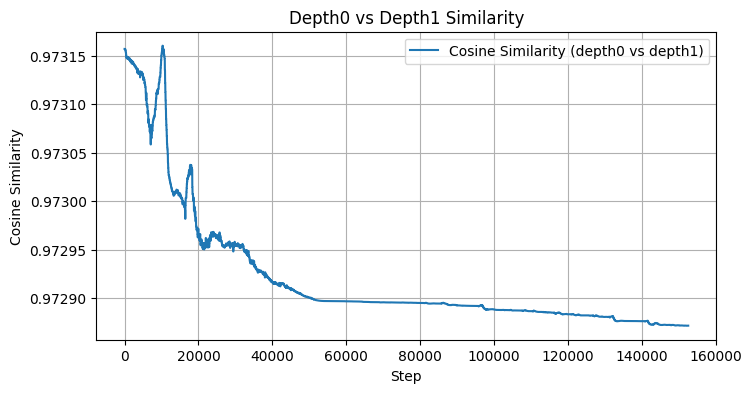

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


def read_log(filepath):
    data = {}
    with open(filepath, "r") as f:
        for line in f:
            # 匹配 "Step xxxx: [a, b, c, ...]"
            match = re.match(r"Step (\d+): \[(.*)\]", line.strip())
            if match:
                step = int(match.group(1))
                values = [float(x) for x in match.group(2).split(",")]
                data[step] = np.array(values, dtype=float)
    return data


def compute_cosine_curve(logfile0, logfile1):
    data0 = read_log(logfile0)
    data1 = read_log(logfile1)

    # 找到两个 log 中共同的 step
    common_steps = sorted(set(data0.keys()) & set(data1.keys()))

    steps = []
    sims = []

    for step in common_steps:
        v0 = data0[step].reshape(1, -1)
        v1 = data1[step].reshape(1, -1)
        sim = cosine_similarity(v0, v1)[0, 0]
        steps.append(step)
        sims.append(sim)

    return steps, sims


logfile0 = "../logs/depth_router_recur0.log"
logfile1 = "../logs/depth_router_recur1.log"

steps, sims = compute_cosine_curve(logfile0, logfile1)

# for s, sim in list(zip(steps, sims)):
#     print(f"Step {s}: Cosine Similarity = {sim:.4f}")

# 画图
plt.figure(figsize=(8, 4))
plt.plot(steps, sims, label="Cosine Similarity (depth0 vs depth1)")
plt.xlabel("Step")
plt.ylabel("Cosine Similarity")
plt.title("Depth0 vs Depth1 Similarity")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt


def read_log(filepath):
    data = {}
    with open(filepath, "r") as f:
        for line in f:
            # 匹配 "Step xxxx: [a, b, c, ...]"
            match = re.match(r"Step (\d+): \[(.*)\]", line.strip())
            if match:
                step = int(match.group(1))
                values = [float(x) for x in match.group(2).split(",")]
                data[step] = np.array(values, dtype=float)
    return data


def compute_euclidean_curve(logfile0, logfile1):
    data0 = read_log(logfile0)
    data1 = read_log(logfile1)

    # 找到两个 log 中共同的 step
    common_steps = sorted(set(data0.keys()) & set(data1.keys()))

    steps = []
    dists = []

    for step in common_steps:
        v0 = data0[step]
        v1 = data1[step]
        dist = np.linalg.norm(v0 - v1)  # L2 距离
        steps.append(step)
        dists.append(dist)

    # 归一化到 [0,1]，方便和余弦相似度比较
    dists = np.array(dists)
    sim_norm = 1 - (dists - dists.min()) / (dists.max() - dists.min() + 1e-9)

    return steps, sim_norm


if __name__ == "__main__":
    logfile0 = "../logs/depth_router_recur0.log"
    logfile1 = "../logs/depth_router_recur1.log"

    steps, sims = compute_euclidean_curve(logfile0, logfile1)

    for s, sim in list(zip(steps, sims)):
        print(f"Step {s}: Euclidean-based Similarity = {sim:.4f}")

    # 画图
    plt.figure(figsize=(8, 4))
    plt.plot(steps, sims, label="Euclidean-based Similarity (depth0 vs depth1)")
    plt.xlabel("Step")
    plt.ylabel("Similarity (normalized)")
    plt.title("Depth0 vs Depth1 Euclidean-based Similarity")
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt


def read_log(filepath):
    data = {}
    with open(filepath, "r") as f:
        for line in f:
            match = re.match(r"Step (\d+): \[(.*)\]", line.strip())
            if match:
                step = int(match.group(1))
                values = [float(x) for x in match.group(2).split(",")]
                data[step] = np.array(values, dtype=float)
    return data


def compute_l1_curve(logfile0, logfile1):
    data0 = read_log(logfile0)
    data1 = read_log(logfile1)

    # 找到两个 log 中共同的 step
    common_steps = sorted(set(data0.keys()) & set(data1.keys()))

    steps = []
    dists = []

    for step in common_steps:
        v0 = data0[step]
        v1 = data1[step]
        dist = np.linalg.norm(v0 - v1, ord=1)  # L1 范数
        steps.append(step)
        dists.append(dist)

    # 归一化为 [0,1]，距离越小 → 相似度越大
    dists = np.array(dists)
    sim_norm = 1 - (dists - dists.min()) / (dists.max() - dists.min() + 1e-9)

    return steps, sim_norm


if __name__ == "__main__":
    logfile0 = "../logs/depth_router_recur0.log"
    logfile1 = "../logs/depth_router_recur1.log"

    steps, sims = compute_l1_curve(logfile0, logfile1)

    for s, sim in list(zip(steps, sims)):
        print(f"Step {s}: L1-based Similarity = {sim:.4f}")

    # 绘制曲线
    plt.figure(figsize=(8, 4))
    plt.plot(steps, sims, label="L1-based Similarity (depth0 vs depth1)")
    plt.xlabel("Step")
    plt.ylabel("Similarity (normalized)")
    plt.title("Depth0 vs Depth1 L1-based Similarity")
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
import re
import numpy as np

def read_log(filepath):
    data = {}
    with open(filepath, "r") as f:
        for line in f:
            # 匹配 "Step xxxx: [a, b, c, ...]"
            match = re.match(r"Step (\d+): \[(.*)\]", line.strip())
            if match:
                step = int(match.group(1))
                values = [float(x) for x in match.group(2).split(",")]
                data[step] = np.array(values, dtype=float)
    return data

logfile0 = "../logs/depth_router_recur0.log"
logfile1 = "../logs/depth_router_recur1.log"

data0 = read_log(logfile0)
data1 = read_log(logfile1)

In [ ]:
# 所有 step
steps0 = sorted(data0.keys())
steps1 = sorted(data1.keys())

# 转成矩阵 (n_step, vector_dim)
matrix0 = np.array([data0[s] for s in steps0])
matrix1 = np.array([data1[s] for s in steps1])

print("矩阵形状:", matrix0.shape)  # (n_step, dim)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sims = []
for i in range(len(steps)-1):
    v1 = matrix0[i].reshape(1, -1)
    v2 = matrix0[i+1].reshape(1, -1)
    cos_sims.append(cosine_similarity(v1, v2)[0, 0])

print("相邻步的平均余弦相似度:", np.mean(cos_sims))


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

# 示例向量（假设是 10 维的）
v1 = matrix0[-1]
v2 = matrix1[-1]

# ---------- 方法1: 直接计算余弦相似度 ----------
cos_sim = cosine_similarity([v1], [v2])[0, 0]
print("余弦相似度:", cos_sim)

# ---------- 方法2: PCA 降维后再比较 ----------
X = np.vstack([v1, v2])  # 合并为一个矩阵
pca = PCA(n_components=2)  # 降到 2 维
X_pca = pca.fit_transform(X)

cos_sim_pca = cosine_similarity([X_pca[0]], [X_pca[1]])[0, 0]
print("PCA 后的余弦相似度:", cos_sim_pca)

# ---------- 方法3: 欧几里得距离 ----------
euclidean_dist = np.linalg.norm(v1 - v2)
print("欧几里得距离:", euclidean_dist)

In [ ]:
print(v1)

In [ ]:
print(v2)

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


def read_log(filepath):
    data = {}
    with open(filepath, "r") as f:
        for line in f:
            match = re.match(r"Step (\d+): \[(.*)\]", line.strip())
            if match:
                step = int(match.group(1))
                values = [float(x) for x in match.group(2).split(",")]
                data[step] = np.array(values, dtype=float)
    return data


def compute_all_similarities(logfile0, logfile1):
    data0 = read_log(logfile0)
    data1 = read_log(logfile1)

    # 找到两个 log 中共同的 step
    common_steps = sorted(set(data0.keys()) & set(data1.keys()))

    steps = []
    cos_sims = []
    l2_sims = []
    l1_sims = []

    l2_dists = []
    l1_dists = []

    # 计算每一步的相似度
    for step in common_steps:
        v0 = data0[step]
        v1 = data1[step]

        # 余弦相似度
        cos_sim = cosine_similarity(v0.reshape(1, -1), v1.reshape(1, -1))[0, 0]
        cos_sims.append(cos_sim)

        # L2 距离
        l2_dist = np.linalg.norm(v0 - v1)
        l2_dists.append(l2_dist)

        # L1 距离
        l1_dist = np.linalg.norm(v0 - v1, ord=1)
        l1_dists.append(l1_dist)

        steps.append(step)

    # L2/L1 距离归一化为 [0,1] 相似度
    l2_dists = np.array(l2_dists)
    l2_sims = 1 - (l2_dists - l2_dists.min()) / (l2_dists.max() - l2_dists.min() + 1e-9)

    l1_dists = np.array(l1_dists)
    l1_sims = 1 - (l1_dists - l1_dists.min()) / (l1_dists.max() - l1_dists.min() + 1e-9)

    return steps, cos_sims, l2_sims, l1_sims


if __name__ == "__main__":
    logfile0 = "../logs/depth_router_recur0.log"
    logfile1 = "../logs/depth_router_recur1.log"

    steps, cos_sims, l2_sims, l1_sims = compute_all_similarities(logfile0, logfile1)

    # 打印前几个结果
    for s, c, l2, l1 in list(zip(steps, cos_sims, l2_sims, l1_sims)):
        print(f"Step {s}: Cos={c:.4f}, L2-based={l2:.4f}, L1-based={l1:.4f}")

    # 绘制曲线对比
    plt.figure(figsize=(10, 5))
    plt.plot(steps, cos_sims, label="Cosine Similarity")
    plt.plot(steps, l2_sims, label="L2-based Similarity")
    plt.plot(steps, l1_sims, label="L1-based Similarity")
    plt.xlabel("Step")
    plt.ylabel("Similarity (normalized)")
    plt.title("Depth0 vs Depth1 Similarities")
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


def read_log(filepath):
    data = {}
    with open(filepath, "r") as f:
        for line in f:
            match = re.match(r"Step (\d+): \[(.*)\]", line.strip())
            if match:
                step = int(match.group(1))
                values = [float(x) for x in match.group(2).split(",")]
                data[step] = np.array(values, dtype=float)
    return data


def compute_all_similarities(logfile0, logfile1):
    data0 = read_log(logfile0)
    data1 = read_log(logfile1)

    # 找到两个 log 中共同的 step
    common_steps = sorted(set(data0.keys()) & set(data1.keys()))

    steps = []
    cos_sims = []
    l2_sims = []
    l1_sims = []

    for step in common_steps:
        v0 = data0[step]
        v1 = data1[step]

        # 余弦相似度
        cos_sim = cosine_similarity(v0.reshape(1, -1), v1.reshape(1, -1))[0, 0]
        cos_sims.append(cos_sim)

        # L2 相似度：1 / (1 + L2距离)
        l2_dist = np.linalg.norm(v0 - v1)
        l2_sims.append(1 / (1 + l2_dist))

        # L1 相似度：1 / (1 + L1距离)
        l1_dist = np.linalg.norm(v0 - v1, ord=1)
        l1_sims.append(1 / (1 + l1_dist))

        steps.append(step)

    return steps, cos_sims, l2_sims, l1_sims


if __name__ == "__main__":
    logfile0 = "../logs/depth_router_recur0.log"
    logfile1 = "../logs/depth_router_recur1.log"

    steps, cos_sims, l2_sims, l1_sims = compute_all_similarities(logfile0, logfile1)

    # 打印前几个结果
    for s, c, l2, l1 in list(zip(steps, cos_sims, l2_sims, l1_sims)):
        print(f"Step {s}: Cos={c:.4f}, L2-based={l2:.4f}, L1-based={l1:.4f}")

    # 绘制三张独立图
    plt.figure(figsize=(8, 4))
    plt.plot(steps, cos_sims, color='blue')
    plt.xlabel("Step")
    plt.ylabel("Cosine Similarity")
    plt.title("Depth0 vs Depth1 Cosine Similarity")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 4))
    plt.plot(steps, l2_sims, color='green')
    plt.xlabel("Step")
    plt.ylabel("L2-based Similarity (1/(1+dist))")
    plt.title("Depth0 vs Depth1 L2-based Similarity")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 4))
    plt.plot(steps, l1_sims, color='red')
    plt.xlabel("Step")
    plt.ylabel("L1-based Similarity (1/(1+dist))")
    plt.title("Depth0 vs Depth1 L1-based Similarity")
    plt.grid(True)
    plt.show()
